Question 3b

In [83]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [84]:
TRAINDATA_FNAME = 'mnist_traindata.hdf5'
TESTDATA_FNAME = 'mnist_testdata.hdf5' 
DETECT_CLASS = 2

# Read training data from file
f = h5py.File('mnist_traindata.hdf5', 'r')
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    xdata_train = data['xdata'][:]
    ydata_train = data['ydata'][:]

    target = (ydata_train.argmax(axis=1) == DETECT_CLASS)

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    xdata_test = data['xdata'][:]
    ydata_test = data['ydata'][:]

    target_t = (ydata_test.argmax(axis=1) == DETECT_CLASS)

In [85]:
def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)

def soft_predict_t(w, b, X):
    px = softmax(np.dot(X, w.T)+b.T)
    acc = np.sum(np.argmax(px, axis=1) == np.argmax(ydata_test, axis=1))/len(X)
    return acc

def soft_train(w, b, x, ep=30):
    lr = 0.18
    costs = []
    dw = 0
    db = 0
    acc = []
    test_pred_acc = []

    for i in range(ep):

        px = softmax(np.dot(x, w.T)+b.T)
        loss = -np.sum(ydata_train * np.log(px+10e-10))/len(x)
        costs.append(loss)

        dz = ydata_train - px
        dw = (-1/len(x)) * ((ydata_train.T - softmax(w @ x.T)) @ x)
        db = np.sum(dz)/len(x)

        w = w - lr * dw
        b = b - lr * db

        acc.append(np.sum(np.argmax(px, axis=1) == np.argmax(ydata_train, axis=1))/len(x)*100)
        test_pred_acc.append(soft_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc

def soft_train_t(w, b, x, ep=30):
    lr = 0.18
    costs = []
    dw = 0
    db = 0
    acc = []
    test_pred_acc = []

    for i in range(ep):

        px = softmax(np.dot(x, w.T)+b.T)
        loss = -np.sum(ydata_test * np.log(px+10e-10))/len(x)
        costs.append(loss)

        dz = ydata_test - px
        dw = (-1/len(x)) * ((ydata_test.T - softmax(w @ x.T)) @ x)
        db = np.sum(dz)/len(x)

        w = w - lr * dw
        b = b - lr * db

        acc.append(np.sum(np.argmax(px, axis=1) == np.argmax(ydata_test, axis=1))/len(x)*100)
        test_pred_acc.append(soft_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc


def plot(train_costs, train_acc, test_acc, test_costs):
    plt.figure(figsize=(7,15))
    plt.plot(list(range(len(train_costs))), train_costs, label = 'Train',color='blue')
    plt.plot(list(range(len(test_costs))), test_costs, label = 'Test', color='orange')
    plt.ylim(7, 12)
    plt.yticks(np.arange(7.5, 11.5, 0.3))
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()

    plt.plot(list(range(len(train_acc)-1)), train_acc[1:], label = 'Train', color='blue')
    plt.plot(list(range(len(test_acc)-1)), test_acc[1:], label = 'Test', color='orange')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.show()

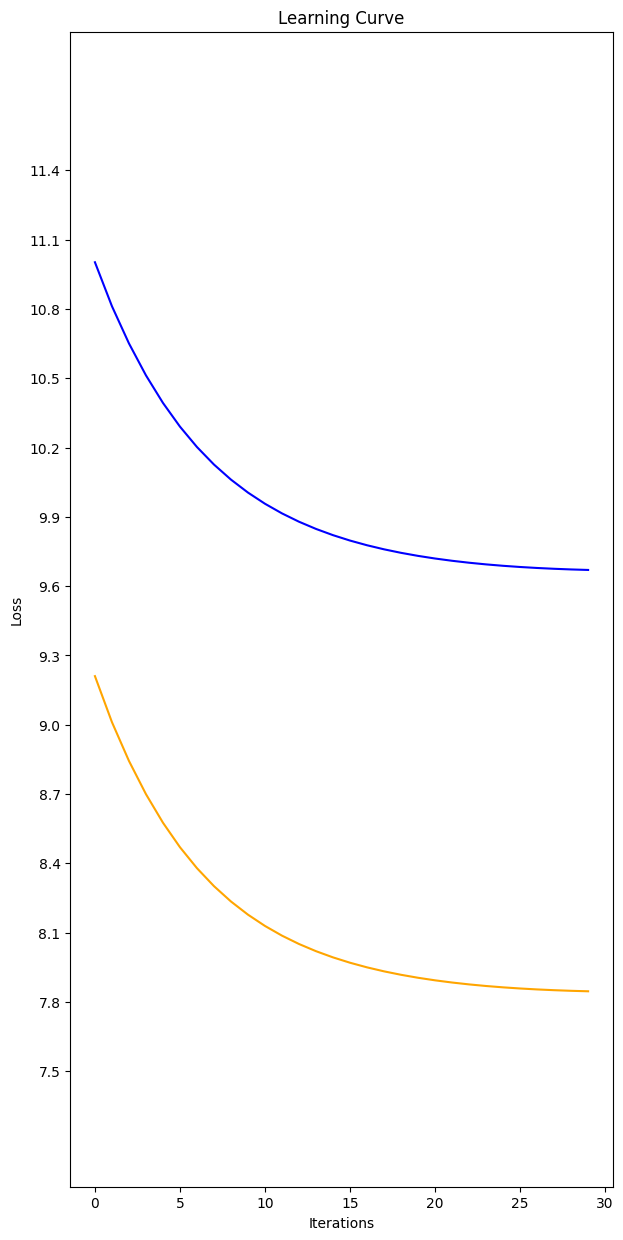

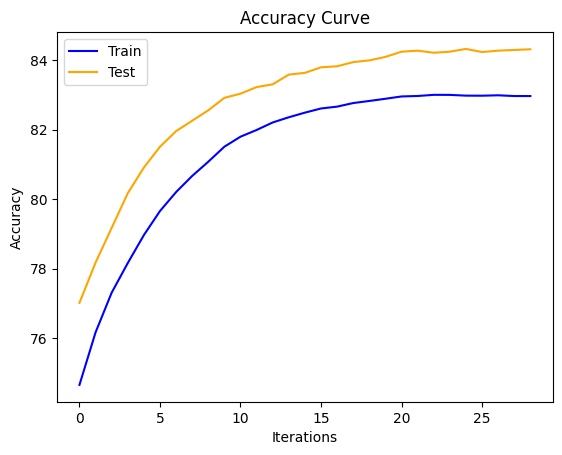

Training Accuracy = 83.00666666666666%
Test Accuracy =  84.33%
Final cost of training data = 9.669990067213293%
Final cost of test data = 7.846034765772879%


In [86]:
w0 = np.zeros((10, 784))
b0 = np.zeros((10, 1))

soft_train_acc, soft_train_costs, soft_w_opt, soft_b_opt, soft_test_acc = soft_train(w0, b0, xdata_train)
test_acc_t, test_costs, w_opt_t, b_opt_t, test_acc_tt = soft_train_t(w0, b0, xdata_test)
plot(soft_train_costs, soft_train_acc, soft_test_acc, test_costs)


print("Training Accuracy = " + str(max(soft_train_acc)) + "%")
print("Test Accuracy =  " + str(max(soft_test_acc)) + "%")
print("Final cost of training data = " + str(min(soft_train_costs)))
print("Final cost of test data = " + str(min(test_costs)))


ii) The Learning Rate used = 0.18